In [ ]:
pip install wordcloud

In [1]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

#pip install wordcloud
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
TextBlob("The movie is good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [3]:
TextBlob("This movie is bad").sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [4]:
comments = pd.read_csv('Comments.csv',encoding='utf8',error_bad_lines=False);

In [5]:
comments.head()

,video_id,comments,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,4.0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3.0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3.0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3.0,0.0
4,XpVt6Z1Gjjo,trending ðŸ˜‰,3.0,0.0


In [6]:
comments.shape


(41445, 4)

In [7]:
comments.isnull()

,video_id,comments,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [8]:
comm=comments.iloc[:,1]

In [9]:
comm.head()


0                                              Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸
1    I've been following you from the start of your vine channel and have seen all 365 vlogs
2                                                         Say hi to Kong and maverick for me
3                                                                        MY FAN . attendance
4                                                                              trending ðŸ˜‰
Name: comments, dtype: object

In [10]:
df = pd.DataFrame(comm) 

In [11]:
df.head()

,comments
0,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸
1,I've been following you from the start of your vine channel and have seen all 365 vlogs
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending ðŸ˜‰


In [ ]:
#df = data.sample(100)
#df.shape

In [13]:
df.columns = [
  'Sentiments'
]
df

,Sentiments
0,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸
1,I've been following you from the start of your vine channel and have seen all 365 vlogs
2,Say hi to Kong and maverick for me
3,MY FAN . attendance
4,trending ðŸ˜‰
5,#1 on trending AYYEEEEE
6,The end though ðŸ˜­ðŸ‘ðŸ»â¤ï¸
7,#1 trending!!!!!!!!!
8,Happy one year vlogaversary
9,You and your shit brother may have single handedly ruined YouTube.....thanks...


In [14]:
df.isnull().values.any()
df.isnull().sum()

Sentiments    1
dtype: int64

In [15]:
#Calculating the Sentiment Polarity
pol=[] # list which will contain the polarity of the comments
for i in df.Sentiments.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [16]:
df['pol']=pol


In [18]:
df.pol

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.800000
9       -0.135714
10       0.000000
11       0.200000
12      -0.023333
13       0.500000
14       0.000000
15       0.800000
16      -0.291667
17       0.000000
18       0.250000
19      -0.800000
20       0.000000
21       0.000000
22       0.650000
23       0.000000
24       0.375000
25       0.000000
26       0.000000
27       0.500000
28      -0.050000
29       0.344481
           ...   
41415    0.050000
41416    0.089610
41417    0.500000
41418    0.390000
41419    0.191209
41420    0.073889
41421    0.200000
41422    0.193939
41423    0.104167
41424    0.700000
41425    0.750000
41426    0.335417
41427    0.311111
41428   -0.212500
41429    0.500000
41430    0.025298
41431    0.200000
41432    0.275000
41433   -0.140000
41434    0.350000
41435   -0.075000
41436    0.107468
41437    0.041667
41438    0.200000
41439    0

In [19]:
df['pol'][df.pol==0]= 0
df['pol'][df.pol > 0]= 1
df['pol'][df.pol < 0]= -1

In [20]:
#Displaying POSITIVE Comments
df_positive = df[df.pol==1]
df_positive.head(10)

,Sentiments,pol
8,Happy one year vlogaversary,1.0
11,"Dear Logan, I really wanna get your Merch but I don't have the money. We don't even have a Car. It would really make my day to have any of your merch",1.0
13,Casey is still better then logan,1.0
15,He happy cause he in a movie,1.0
18,It's been fun watching you grow. I'm at 42 days straight and can't seem to grow. Any advice?,1.0
22,"lol PEWDIEPIE accidentally played song with words nig%%r during his stream, u can watch that part on my channel, i've just uploaded. Like so more ppl could see this",1.0
24,I love Logan and Jake so much and thay are so amazing and I look up to them so much ðŸ˜ðŸ’‹ðŸ’™ðŸ‘,1.0
27,if you get allot of diss likes do you get on the top comments? lets see diss like this please,1.0
29,I love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\nBecause everyone loves it and will be Unique and Pashan will be ...,1.0
30,ðŸ‘ˆ watch by clicking here you can see people's are entertaining,1.0


In [21]:
#Displaying the NEGATIVE comments
df_positive = df[df.pol==-1]
df_positive.head(10)

,Sentiments,pol
9,You and your shit brother may have single handedly ruined YouTube.....thanks...,-1.0
12,Honestly Evan is so annoying. Like its not funny watching him try to be famous he's trying way to hard and I don't like it,-1.0
16,"Ayyyyoooo Logang what up . This was a hard vlog to watch Logan how dare are you to destroyed that YouTube bag . Logang Army check my covers and share them can Logang help me to hit 1,000 Subscri...",-1.0
19,Made a lot of people hate youtube - GJ,-1.0
28,Evan is a horrible human being he also looks so jealous when you open it like he should be happy for you,-1.0
34,Gotta love Youtube for giving morons the ability to earn a buck from other morons.,-1.0
36,Can the Pauls please stop saying they're the fastest growing YouTube channels?! That's PewDiePie's position!! He made managed to get all the subscribers you guys have in 6 MONTHS!!! Why is that so...,-1.0
42,Not a hater but fuck you,-1.0
43,Where is the other dog,-1.0
44,I go out of my way to dislike every single one your videos,-1.0


In [22]:
#Displaying the NEUTRAL comments
df_positive = df[df.pol==0]
df_positive.head(10)

,Sentiments,pol
0,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,0.0
1,I've been following you from the start of your vine channel and have seen all 365 vlogs,0.0
2,Say hi to Kong and maverick for me,0.0
3,MY FAN . attendance,0.0
4,trending ðŸ˜‰,0.0
5,#1 on trending AYYEEEEE,0.0
6,The end though ðŸ˜­ðŸ‘ðŸ»â¤ï¸,0.0
7,#1 trending!!!!!!!!!,0.0
10,There should be a mini Logan Paul too!,0.0
14,aw geez rick this guy is the face of YouTube.,0.0


In [23]:
df

,Sentiments,pol
0,Logan Paul it's yo big day â€¼ï¸â€¼ï¸â€¼ï¸,0.0
1,I've been following you from the start of your vine channel and have seen all 365 vlogs,0.0
2,Say hi to Kong and maverick for me,0.0
3,MY FAN . attendance,0.0
4,trending ðŸ˜‰,0.0
5,#1 on trending AYYEEEEE,0.0
6,The end though ðŸ˜­ðŸ‘ðŸ»â¤ï¸,0.0
7,#1 trending!!!!!!!!!,0.0
8,Happy one year vlogaversary,1.0
9,You and your shit brother may have single handedly ruined YouTube.....thanks...,-1.0


 1.0    17942
 0.0    16846
-1.0     6657
Name: pol, dtype: int64

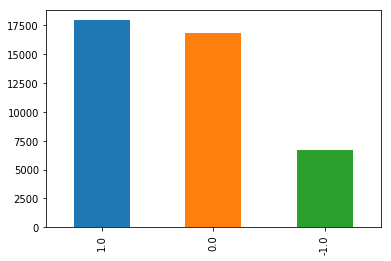

In [24]:
df.pol.value_counts().plot.bar()
df.pol.value_counts()

In [25]:
stopwords = set(STOPWORDS)


In [26]:
headlines = str(df.Sentiments)


In [33]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         )
wordcloud.generate(headlines)
print(wordcloud)

In [28]:
wordcloud.generate(headlines)

In [29]:
print(wordcloud)

In [30]:
fig = plt.figure(1)

<Figure size 432x288 with 0 Axes>

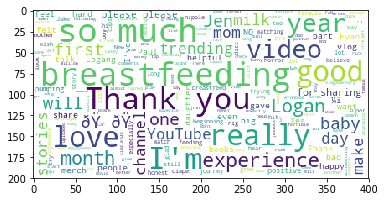

In [31]:
plt.imshow(wordcloud)


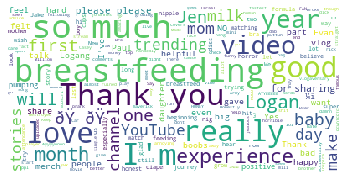

In [32]:
ax1 = plt.axes(frameon=False)
ax1.set_frame_on(False)
ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)

plt.imshow(wordcloud)


In [ ]:


#df.edjefe.replace(to_replace=['no', 'yes'], value=[0, 1])

df.pol().replace(to_replace=[1.0, -1.0], value=["Yes", "No"])
